In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


# Chi-squared distribution with 3 degrees of freedom

Generate sample:

In [9]:
chi2_rv = sts.chi2(3)            # 3 degrees of freedom
sample = chi2_rv.rvs(1000)       # 1000 variates


Histogram and theoretical distribution:

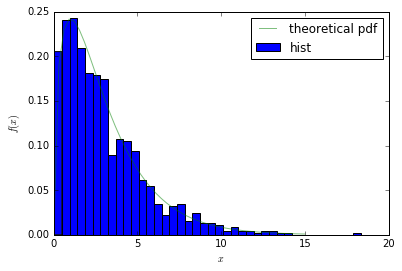

In [10]:
plt.hist(sample, bins=40, normed=True, label='hist')     # histogram based on sample

x = np.linspace(0, 15)
pdf = chi2_rv.pdf(x)                                     # theorettical probability density function
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Central limit theorem

Define function for calculating means of samples with different sizes:

In [52]:
def calc_mean(size):
    samples = []
    sample = None
    for i in range(0, 1000):
        sample = chi2_rv.rvs(size)                 # generate sample with size = size
        samples.append(np.mean(sample))            # append mean of the sample
    return samples                                 # return means for each sample

According to wikipedia:<br>
    $\sigma^2 = 2k, \mu = k$
<br>
So, using Central Limit theorem:<br>
    $\overline{X_n} \stackrel{\text{d}}{=} N(\mu, \frac{\sigma^2}{n}) = N(k, \frac{2k}{n})$

Create samples with sizes 5, 10 and 50, draw their means' histograms and theoretical distribution function:


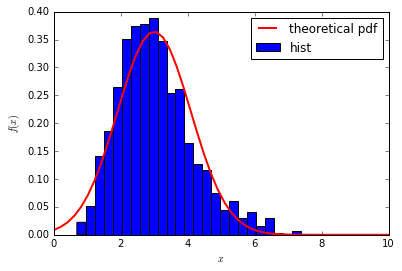

In [49]:
samples_mean = calc_mean(5)                                             # size = 10
hist5 = plt.hist(samples_mean, bins=25, normed=True, label='hist')      # histogram of means

# add theoretical dist to the plot
x = np.linspace(0, 10)
norm_rv = sts.norm(chi2_rv.mean(), np.sqrt(chi2_rv.var() / 5.))  
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='r', linewidth=2.0)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Same for n = 10 and n = 50:

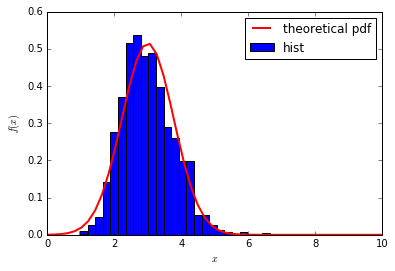

In [50]:
hist10 = plt.hist(calc_mean(10), bins=25, normed=True, label='hist')     # size = 100

norm_rv = sts.norm(chi2_rv.mean(), np.sqrt(chi2_rv.var() / 10.))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='r', linewidth=2.0)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

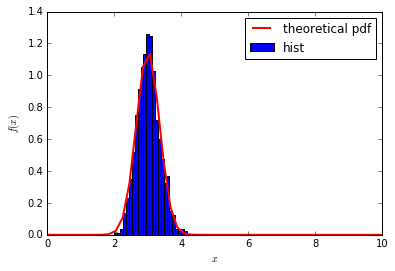

In [51]:
hist50 = plt.hist(calc_mean(50), bins=25, normed=True, label='hist')     # size = 500

norm_rv = sts.norm(chi2_rv.mean(), np.sqrt(chi2_rv.var() / 50.))         # k = 3
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='r', linewidth=2.0)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Conclusion

As you can see with bigger amounts of data Central Limit theorem approximates our distribution more accurate.
There is almost no difference between approximation for samples with sizes 5 and 10, but for the samples with size 50 CLT fits data almost perfectly.